# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of a traffic sign image?
image_shape = X_valid.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration vis|ualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#### Explore 1: list all labels in the dataset

In [4]:
import csv

fname = 'signnames.csv'
signnames = []
with open(fname, 'r') as signfile:
    reader = csv.reader(signfile)
    for row in reader:
        try:
            ix = int(row[0])
            signnames.append(row[1])
            print('{:2d}: {}'.format(ix, row[1]))
        except:
            continue

 0: Speed limit (20km/h)
 1: Speed limit (30km/h)
 2: Speed limit (50km/h)
 3: Speed limit (60km/h)
 4: Speed limit (70km/h)
 5: Speed limit (80km/h)
 6: End of speed limit (80km/h)
 7: Speed limit (100km/h)
 8: Speed limit (120km/h)
 9: No passing
10: No passing for vehicles over 3.5 metric tons
11: Right-of-way at the next intersection
12: Priority road
13: Yield
14: Stop
15: No vehicles
16: Vehicles over 3.5 metric tons prohibited
17: No entry
18: General caution
19: Dangerous curve to the left
20: Dangerous curve to the right
21: Double curve
22: Bumpy road
23: Slippery road
24: Road narrows on the right
25: Road work
26: Traffic signals
27: Pedestrians
28: Children crossing
29: Bicycles crossing
30: Beware of ice/snow
31: Wild animals crossing
32: End of all speed and passing limits
33: Turn right ahead
34: Turn left ahead
35: Ahead only
36: Go straight or right
37: Go straight or left
38: Keep right
39: Keep left
40: Roundabout mandatory
41: End of no passing
42: End of no passin

#### Explore 2: show random training image

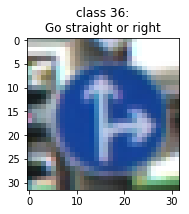

In [5]:
randex = np.random.randint(0, len(y_train))
plt.subplot(1, 2, 1)
plt.imshow(X_train[randex])
plt.gca().set_title('class {:2d}:\n{}'.format(y_train[randex], signnames[y_train[randex]]))
print()

#### Explore 3: show random image from each of the labels

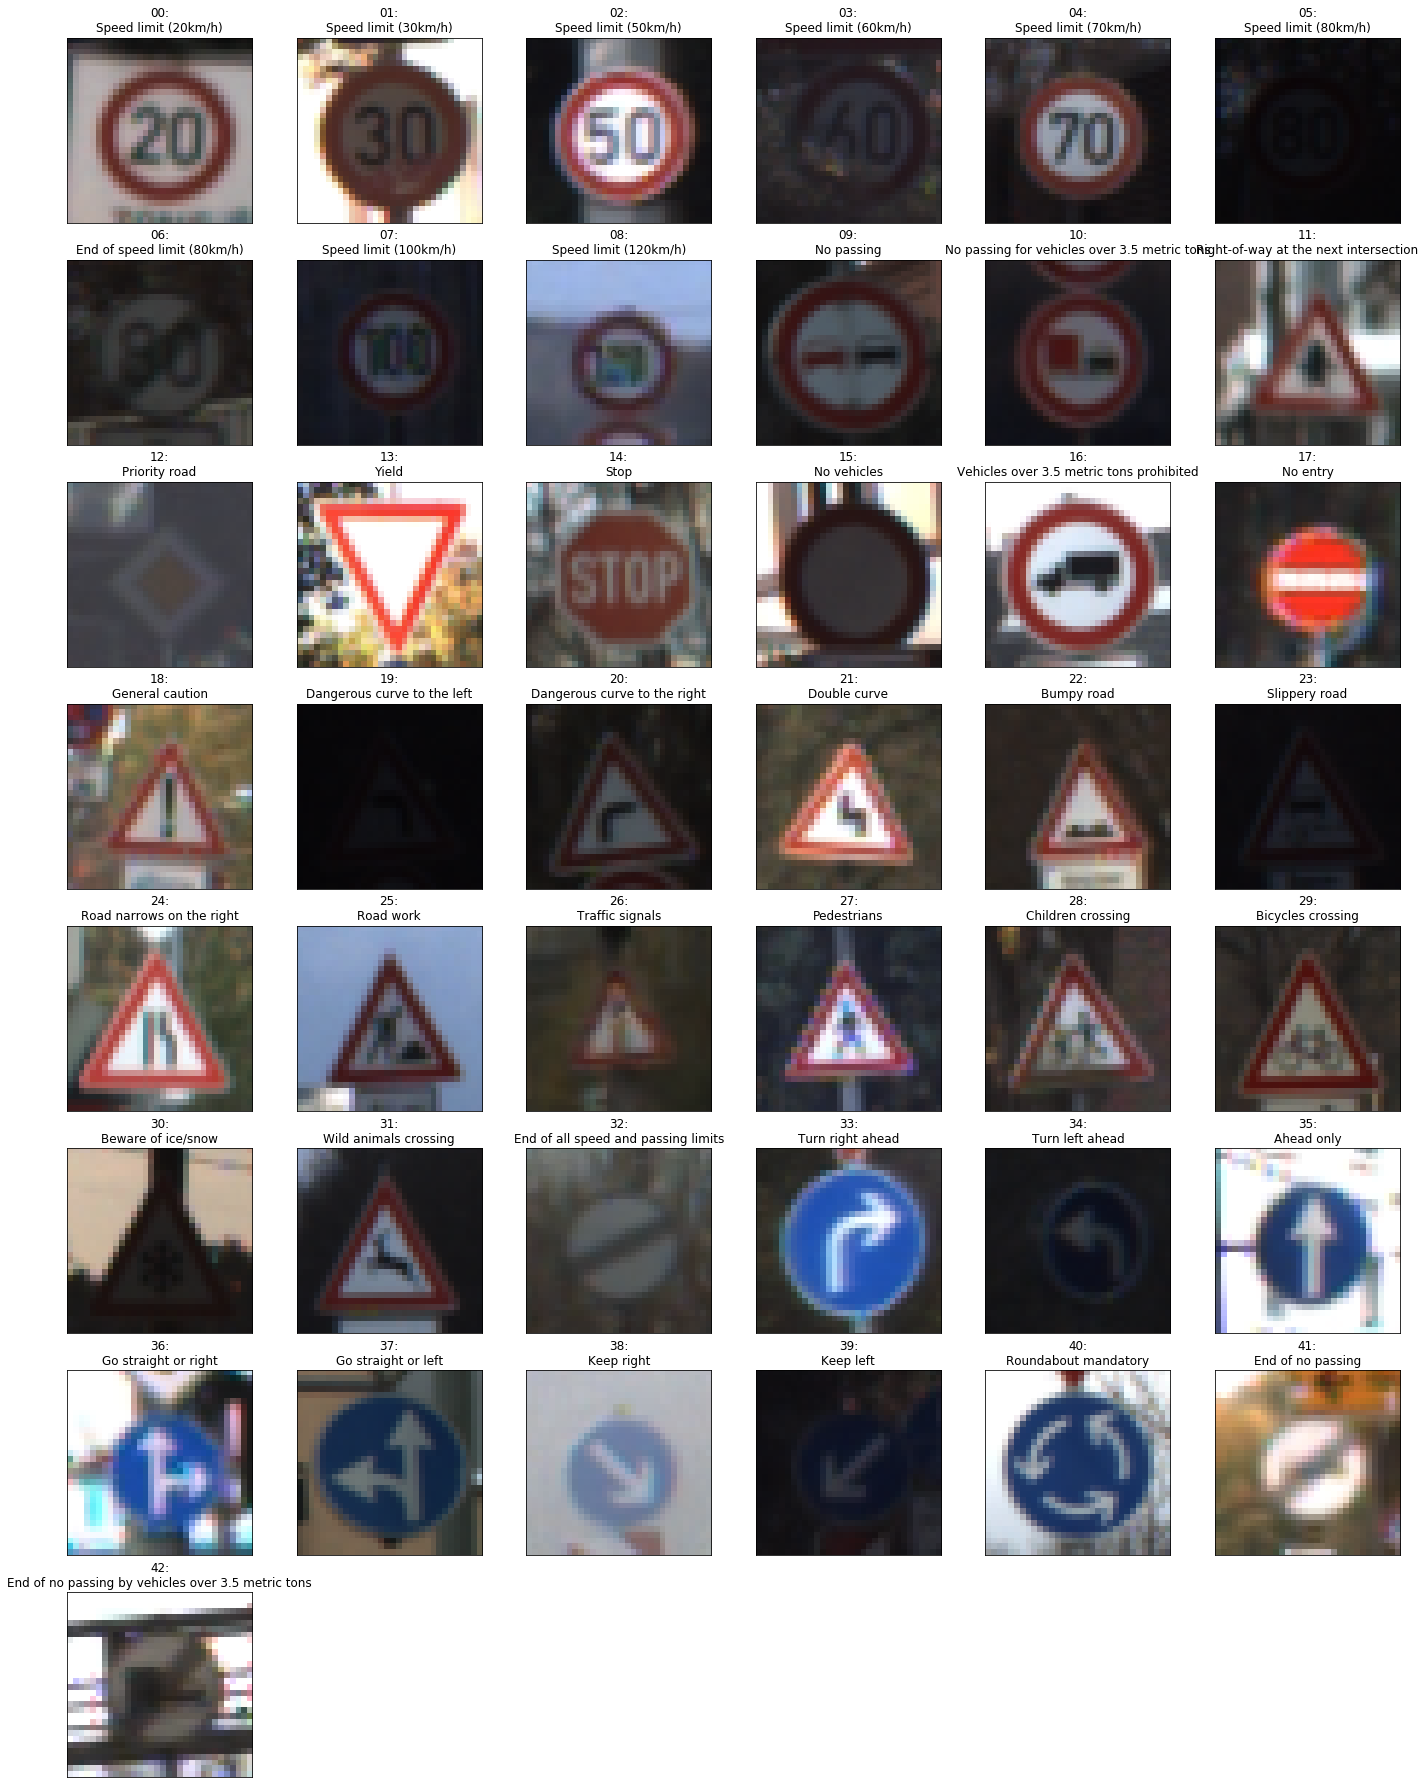

In [6]:
plt.figure(figsize=(24, 32))
for i in range(n_classes):
    randex = np.random.randint(0, len(y_train))
    while not (y_train[randex] == i):
        randex = np.random.randint(0, len(y_train))
        
    plt.subplot(8, 6, i+1)
    plt.imshow(X_train[randex])
    signname = signnames[i]
    plt.gca().set_title('{:02d}:\n{}'.format(i, signnames[i]))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)

#### Explore 4: Count how many samples of each label in training, validation, and test sets

In [7]:
train_count = 43*[0]
valid_count = 43*[0]
test_count = 43*[0]

for dataset, count in zip([y_train, y_valid, y_test], [train_count, valid_count, test_count]):
    for sample in dataset:
        count[sample] += 1

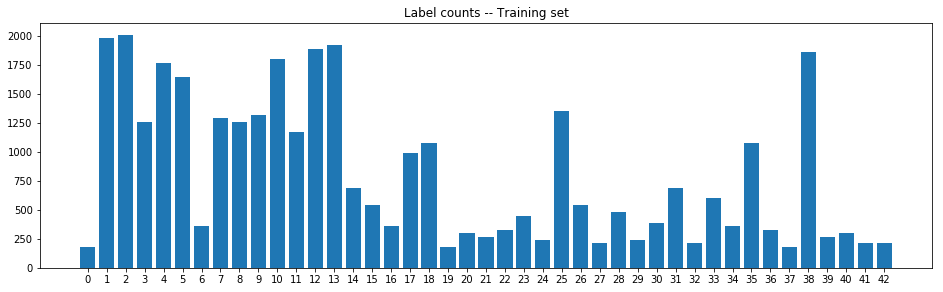

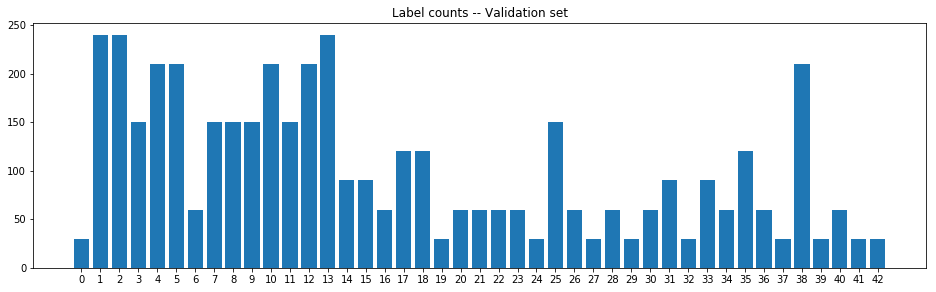

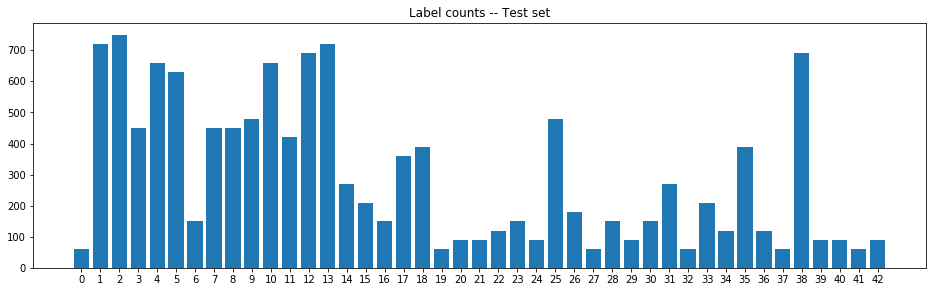

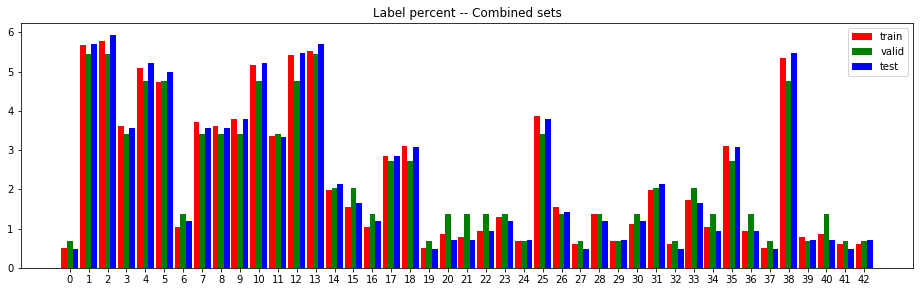

In [8]:
x = np.array(range(43))

plt.figure(figsize=(16, 4.5))
plt.bar(range(43), train_count)
plt.gca().set_title('Label counts -- Training set')
plt.gca().set_xticks(x)

plt.figure(figsize=(16, 4.5))
plt.bar(range(43), valid_count)
plt.gca().set_title('Label counts -- Validation set')
plt.gca().set_xticks(x)

plt.figure(figsize=(16, 4.5))
plt.bar(range(43), test_count)
plt.gca().set_title('Label counts -- Test set')
plt.gca().set_xticks(x)

plt.figure(figsize=(16, 4.5))
plt.bar(x-0.3, train_count/(0.01*np.sum(train_count)), 0.3, label='train', color='r')
plt.bar(x, valid_count/(0.01*np.sum(valid_count)), 0.3, label='valid', color='g')
plt.bar(x+0.3, test_count/(0.01*np.sum(test_count)), 0.3, label='test', color='b')
plt.gca().set_title('Label percent -- Combined sets')
plt.gca().set_xticks(x)

plt.legend()
print()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# compute normalisation parameters
x_mu = np.mean(X_train, 0)
x_sigma = np.std(X_train, 0)

# expects array of rgb images (so you'd have four dimensions)
def greyscale(x):
    x_grey =  0.3*x[:, :, :, 0] + 0.59*x[:, :, :, 1] + 0.11*x[:, :, :, 1]
    return np.reshape(x_grey, list(np.shape(x_grey))+[1])

def preproc_quick(x):
    return (x - 128)/128

# this normalises the data to centre around zero, but there is no particular rationale for the divisor.
# I was at some kind of autopilot
# Also, training, validation, and test sets are normalised **differently**, 
# because the means are calculated per dataset. The flaws keep on coming
def preproc_xbar(x):
    xbar = np.mean(X_train)
    return (x - xbar)/xbar

# Standardisation. Data become centred around zero image with standard deviation one.
def preproc(x):
    return (x - x_mu)/x_sigma

In [10]:
X_train_normal = preproc_quick(greyscale(X_train))
X_valid_normal = preproc_quick(greyscale(X_valid))
X_test_normal = preproc_quick(greyscale(X_test))

# X_train_normal = preproc_xbar(X_train)
# X_valid_normal = preproc_xbar(X_valid)
# X_test_normal = preproc_xbar(X_test)

# X_train_normal = preproc_quick(X_train)
# X_valid_normal = preproc_quick(X_valid)
# X_test_normal = preproc_quick(X_test)

# X_train_normal = preproc(X_train)
# X_valid_normal = preproc(X_valid)
# X_test_normal = preproc(X_test)

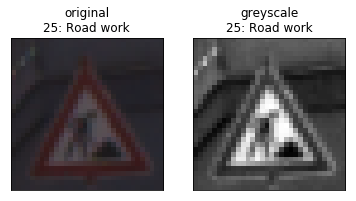

In [11]:
# preprocessed image example

idx = np.random.randint(0, len(X_train))
label = '{:d}: {}'.format(y_train[idx], signnames[y_train[idx]])

plt.subplot(1, 2, 1)
plt.imshow(X_train[idx])
plt.gca().set_title('original\n{}'.format(label))
plt.gca().set_xticks([])
plt.gca().set_yticks([])

plt.subplot(1, 2, 2)
plt.imshow(np.reshape(greyscale(X_train[idx:idx+1]), (32, 32)), cmap='gray')
plt.gca().set_title('greyscale\n{}'.format(label))
plt.gca().set_xticks([])
plt.gca().set_yticks([]);

### Model Architecture

In [12]:
# Import infrastructure

import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [13]:
# Hyperparameters
EPOCHS = 32
BATCH_SIZE = 128

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def network(x, keep_prob, mu=0, sigma=0.1):
    conv1_depth = 32
    conv2_depth = 64
    dense1_size = 512
    dense2_size = 128
    
    # conv layer 1
    conv1_W = tf.Variable(tf.truncated_normal((5, 5, 3, conv1_depth), mu, sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(conv1_depth), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], 'VALID') + conv1_b # 32 32 16
    conv1 = tf.nn.relu(conv1)
    
    # maxpool 1
    pool1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID') # 16 16 16
    
    # conv layer 2
    conv2_W = tf.Variable(tf.truncated_normal((5, 5, conv1_depth, conv2_depth), mu, sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(conv2_depth), name='conv2_b')
    conv2 = tf.nn.conv2d(pool1, conv2_W, [1, 1, 1, 1], 'VALID') + conv2_b # 16 16 32
    conv2 = tf.nn.relu(conv2)
    
    # maxpool 2
    pool2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID') # 8 8 32
    
    # flatten
    dense0 = flatten(pool2)
    
    # dense layer 1
    dense1_W = tf.Variable(tf.truncated_normal((5*5*conv2_depth, dense1_size), mu, sigma), name='dense1_W')
    dense1_b = tf.Variable(tf.zeros(dense1_size), name='dense1_b')
    dense1 = tf.matmul(dense0, dense1_W) + dense1_b
    dense1 = tf.nn.relu(dense1)
    dense1 = tf.nn.dropout(dense1, keep_prob)
    
    # dense layer 2
    dense2_W = tf.Variable(tf.truncated_normal((dense1_size, dense2_size), mu, sigma), name='dense2_W')
    dense2_b = tf.Variable(tf.zeros(dense2_size), name='dense2_b')
    dense2 = tf.matmul(dense1, dense2_W) + dense2_b
    dense2 = tf.nn.relu(dense2)
    dense2 = tf.nn.dropout(dense2, keep_prob)
    
    # dense layer 3
    dense3_W = tf.Variable(tf.truncated_normal((dense2_size, 43), mu, sigma), name='dense3_W')
    dense3_b = tf.Variable(tf.zeros(43), name='dense3_b')
    dense3 = tf.matmul(dense2, dense3_W) + dense3_b
    
    return dense3

In [15]:
## network builder for more dense layers

def network_md(x, keep_prob, mu=0, sigma=0.1):
    conv1_depth = 16
    conv2_depth = 32
    dense1_size = 512
    dense2_size = 256
    dense2a_size = 128
    
    # conv layer 1
    conv1_W = tf.Variable(tf.truncated_normal((5, 5, 3, conv1_depth), mu, sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(conv1_depth), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # maxpool 1
    pool1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # conv layer 2
    conv2_W = tf.Variable(tf.truncated_normal((5, 5, conv1_depth, conv2_depth), mu, sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(conv2_depth), name='conv2_b')
    conv2 = tf.nn.conv2d(pool1, conv2_W, [1, 1, 1, 1], 'VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    # maxpool 2
    pool2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # flatten
    dense0 = flatten(pool2)
    
    # dense layer 1
    dense1_W = tf.Variable(tf.truncated_normal((5*5*conv2_depth, dense1_size), mu, sigma), name='dense1_W')
    dense1_b = tf.Variable(tf.zeros(dense1_size), name='dense1_b')
    dense1 = tf.matmul(dense0, dense1_W) + dense1_b
    dense1 = tf.nn.relu(dense1)
    dense1 = tf.nn.dropout(dense1, keep_prob)
    
    # dense layer 2
    dense2_W = tf.Variable(tf.truncated_normal((dense1_size, dense2_size), mu, sigma), name='dense2_W')
    dense2_b = tf.Variable(tf.zeros(dense2_size), name='dense2_b')
    dense2 = tf.matmul(dense1, dense2_W) + dense2_b
    dense2 = tf.nn.relu(dense2)
    dense2 = tf.nn.dropout(dense2, keep_prob)
    
    # dense layer 2a
    dense2a_W = tf.Variable(tf.truncated_normal((dense2_size, dense2a_size), mu, sigma), name='dense2a_W')
    dense2a_b = tf.Variable(tf.zeros(dense2a_size), name='dense2a_b')
    dense2a = tf.matmul(dense2, dense2a_W) + dense2a_b
    dense2a = tf.nn.relu(dense2a)
    dense2a = tf.nn.dropout(dense2a, keep_prob)
    
    # dense layer 3
    dense3_W = tf.Variable(tf.truncated_normal((dense2a_size, 43), mu, sigma), name='dense3_W')
    dense3_b = tf.Variable(tf.zeros(43), name='dense3_b')
    dense3 = tf.matmul(dense2a, dense3_W) + dense3_b
    
    return dense3

In [16]:
### Multiscale network, similar to [Sermanet 2011]

def network_ms(x, keep_prob, mu=0, sigma=0.1, grey=True):
    conv1_depth = 16
    conv2_depth = 32
    dense1_size = 100
    dense2_size = 50
    
    # conv layer 1
    if grey:
        conv1_W = tf.Variable(tf.truncated_normal((5, 5, 1, conv1_depth), mu, sigma), name='conv1_W')
    else:
        conv1_W = tf.Variable(tf.truncated_normal((5, 5, 3, conv1_depth), mu, sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(conv1_depth), name='conv1_b')
    conv1 = tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], 'VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # maxpool 1
    pool1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # flatten stage 1
    dense0a = flatten(pool1) # 14 x 14 x conv1_depth
    
    # conv layer 2
    conv2_W = tf.Variable(tf.truncated_normal((5, 5, conv1_depth, conv2_depth), mu, sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(conv2_depth), name='conv2_b')
    conv2 = tf.nn.conv2d(pool1, conv2_W, [1, 1, 1, 1], 'VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    
    # maxpool 2
    pool2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1], 'VALID')
    
    # flatten stage 2
    dense0b = flatten(pool2) # 5 x 5 x conv2_depth
    
    # concatenate the two flats
    dense0 = tf.concat([dense0a, dense0b], 1)
    
    feat_size = 14*14*conv1_depth + 5*5*conv2_depth
    
    # dense layer 1
    dense1_W = tf.Variable(tf.truncated_normal((feat_size, dense1_size), mu, sigma), name='dense1_W')
    dense1_b = tf.Variable(tf.zeros(dense1_size), name='dense1_b')
    dense1 = tf.matmul(dense0, dense1_W) + dense1_b
    dense1 = tf.nn.relu(dense1)
    dense1 = tf.nn.dropout(dense1, keep_prob)
    
    # dense layer 2
    dense2_W = tf.Variable(tf.truncated_normal((dense1_size, dense2_size), mu, sigma), name='dense2_W')
    dense2_b = tf.Variable(tf.zeros(dense2_size), name='dense2_b')
    dense2 = tf.matmul(dense1, dense2_W) + dense2_b
    dense2 = tf.nn.relu(dense2)
    dense2 = tf.nn.dropout(dense2, keep_prob)
    
    # dense layer 3
    dense3_W = tf.Variable(tf.truncated_normal((dense2_size, 43), mu, sigma), name='dense3_W')
    dense3_b = tf.Variable(tf.zeros(43), name='dense3_b')
    dense3 = tf.matmul(dense2, dense3_W) + dense3_b
    
    return dense3

In [17]:
tf.reset_default_graph()
# x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x') # for colour images
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x') # for greyscale
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
one_hot_y = tf.one_hot(y, 43)

In [18]:
# training pipeline
rate = 1e-3

# logits = network(x, keep_prob)
logits = network_ms(x, keep_prob, grey=True)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_op = tf.reduce_mean(cross_entropy, name='loss_op')
optimizer = tf.train.AdamOptimizer(learning_rate=rate, name='optimizer')
train_op = optimizer.minimize(loss_op, name='train_op')

In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_op')
saver = tf.train.Saver()

In [20]:
def evaluate(X_data, y_data):
    num_example = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for i in range(0, num_example, BATCH_SIZE):
        bat_X, bat_y = X_data[i:i+BATCH_SIZE], y_data[i:i+BATCH_SIZE]
        bat_accuracy = sess.run(accuracy_op, feed_dict={x: bat_X, y: bat_y, keep_prob: 1.0})
        total_accuracy += (bat_accuracy*len(bat_X))
    
    return total_accuracy/num_example    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training ...

EPOCH  1: validation accuracy: 0.774
EPOCH  2: validation accuracy: 0.881
EPOCH  3: validation accuracy: 0.912
EPOCH  4: validation accuracy: 0.924
EPOCH  5: validation accuracy: 0.931
EPOCH  6: validation accuracy: 0.930
EPOCH  7: validation accuracy: 0.939
EPOCH  8: validation accuracy: 0.954
EPOCH  9: validation accuracy: 0.949
EPOCH 10: validation accuracy: 0.953
EPOCH 11: validation accuracy: 0.942
EPOCH 12: validation accuracy: 0.951
EPOCH 13: validation accuracy: 0.946
EPOCH 14: validation accuracy: 0.951
EPOCH 15: validation accuracy: 0.946
EPOCH 16: validation accuracy: 0.961
EPOCH 17: validation accuracy: 0.956
EPOCH 18: validation accuracy: 0.955
EPOCH 19: validation accuracy: 0.957
EPOCH 20: validation accuracy: 0.950
EPOCH 21: validation accuracy: 0.956
EPOCH 22: validation accuracy: 0.954
EPOCH 23: validation accuracy: 0.964
EPOCH 24: validation accuracy: 0.954
EPOCH 25: validation accuracy: 0.951
EPOCH 26: validation accuracy: 0.958
EPOCH 27: validation acc

(0.8, 1.0)

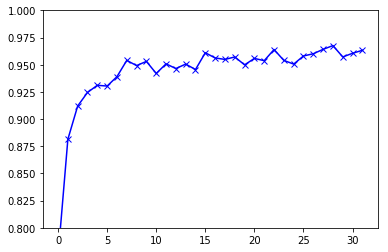

In [21]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normal)
    
    epoch_accuracies = []
    
    print("Training ...")
    print()
    for i_epoch in range(EPOCHS):
        X_train_normal, y_train = shuffle(X_train_normal, y_train)
        for i_bat in range(0, num_examples, BATCH_SIZE):
            end = i_bat + BATCH_SIZE
            bat_X, bat_y = X_train_normal[i_bat:end], y_train[i_bat:end]
            sess.run(train_op, feed_dict={x: bat_X, y: bat_y, keep_prob: 0.75})
            
        valid_accuracy = evaluate(X_valid_normal, y_valid)
        epoch_accuracies.append(valid_accuracy)
        print('EPOCH {:2d}: validation accuracy: {:5.3f}'.format(i_epoch+1, valid_accuracy))
    
    saver.save(sess, './experiments/default/signnet')
    print('Model saved!')
    
plt.plot(range(len(epoch_accuracies)), epoch_accuracies, 'bx-')
plt.gca().set_ylim([0.8, 1.0])

### Continue training with loaded weights

If it looks like the accuracy is still increasing at the final epoch, do a few more epochs here.

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet
Begin training ...
Epoch 01 accuracy: 0.963
Epoch 02 accuracy: 0.959
Epoch 03 accuracy: 0.970
Epoch 04 accuracy: 0.963
Epoch 05 accuracy: 0.955
Epoch 06 accuracy: 0.966
Epoch 07 accuracy: 0.956
Epoch 08 accuracy: 0.963
Epoch 09 accuracy: 0.961
Epoch 10 accuracy: 0.965
Epoch 11 accuracy: 0.967
Epoch 12 accuracy: 0.965
Epoch 13 accuracy: 0.962
Epoch 14 accuracy: 0.968
Epoch 15 accuracy: 0.967
Epoch 16 accuracy: 0.968
Epoch 17 accuracy: 0.970
Epoch 18 accuracy: 0.970
Epoch 19 accuracy: 0.972
Epoch 20 accuracy: 0.957
Epoch 21 accuracy: 0.955
Epoch 22 accuracy: 0.963
Epoch 23 accuracy: 0.966
Epoch 24 accuracy: 0.966
Epoch 25 accuracy: 0.961
Epoch 26 accuracy: 0.965
Epoch 27 accuracy: 0.963
Epoch 28 accuracy: 0.962
Epoch 29 accuracy: 0.958
Epoch 30 accuracy: 0.963
Epoch 31 accuracy: 0.964
Epoch 32 accuracy: 0.956
Model saved!


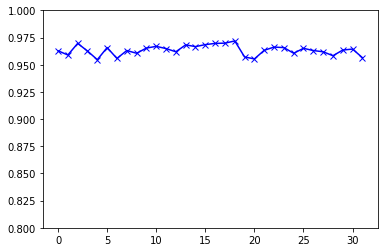

In [22]:
extra_epochs = 32

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    num_examples = len(X_train_normal)
    epoch_accuracies = []
    
    print("Begin training ...")
    for epoch in range(extra_epochs):
        X_train_normal, y_train = shuffle(X_train_normal, y_train)
        
        ping_interval = num_examples//2
        ping_multi = 1
        for i_bat in range(0, num_examples, BATCH_SIZE):
            end = i_bat + BATCH_SIZE
            x_bat, y_bat = X_train_normal[i_bat:end], y_train[i_bat:end]
            sess.run(train_op, feed_dict={x: x_bat, y: y_bat, keep_prob: 0.75})
            
        valid_accuracy = evaluate(X_valid_normal, y_valid)
        epoch_accuracies.append(valid_accuracy)
        print('Epoch {:02d} accuracy: {:5.3f}'.format(epoch+1, valid_accuracy))
    saver.save(sess, './experiments/default/signnet')
    print('Model saved!')
    plt.plot(range(len(epoch_accuracies)), epoch_accuracies, 'bx-')
    plt.gca().set_ylim([0.8, 1.0])

### Load pre-trained weights, then verify validation accuracy

Skip this cell if you haven't trained any

In [56]:
# Show accuracy with training and validation set

with tf.Session() as sess:
#     restorer = tf.train.import_meta_graph('./experiments/default/signnet.meta')
#     restorer.restore(sess, tf.train.latest_checkpoint('./experiments/default/'))
#     graph = tf.get_default_graph()
    saver.restore(sess, './experiments/default/signnet')
    
    trainaccu = evaluate(X_train_normal, y_train)
    print('training accuracy: {:5.3f}'.format(trainaccu))
    validaccu = evaluate(X_valid_normal, y_valid)    
    print('validation accuracy: {:5.3f}'.format(validaccu))

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet
training accuracy: 1.000
validation accuracy: 0.966


In [57]:
### Show accuracy with test set
### DANGER DANGER DANGER DANGER DANGER
### Only do this when you're ready with the arch

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    testaccu = evaluate(X_test_normal, y_test)
    print('testing accuracy: {:5.3f}'.format(testaccu))

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet
testing accuracy: 0.945


### Confusion Matrix

Which class is most likely to be misclassified into which class?

In [58]:
confusion = np.zeros((43, 43))

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    num_sample = len(X_valid_normal)

    yhat_valid = []
    for i_bat in range(0, num_sample, BATCH_SIZE):
        end = i_bat + BATCH_SIZE
        x_bat, y_bat = X_valid_normal[i_bat:end], y_valid[i_bat:end]
        bat_logits = sess.run(logits, feed_dict={x: x_bat, keep_prob: 1.0})
        bat_classes = sess.run(tf.argmax(bat_logits, 1))
        
        yhat_valid += list(bat_classes)
    
    

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet


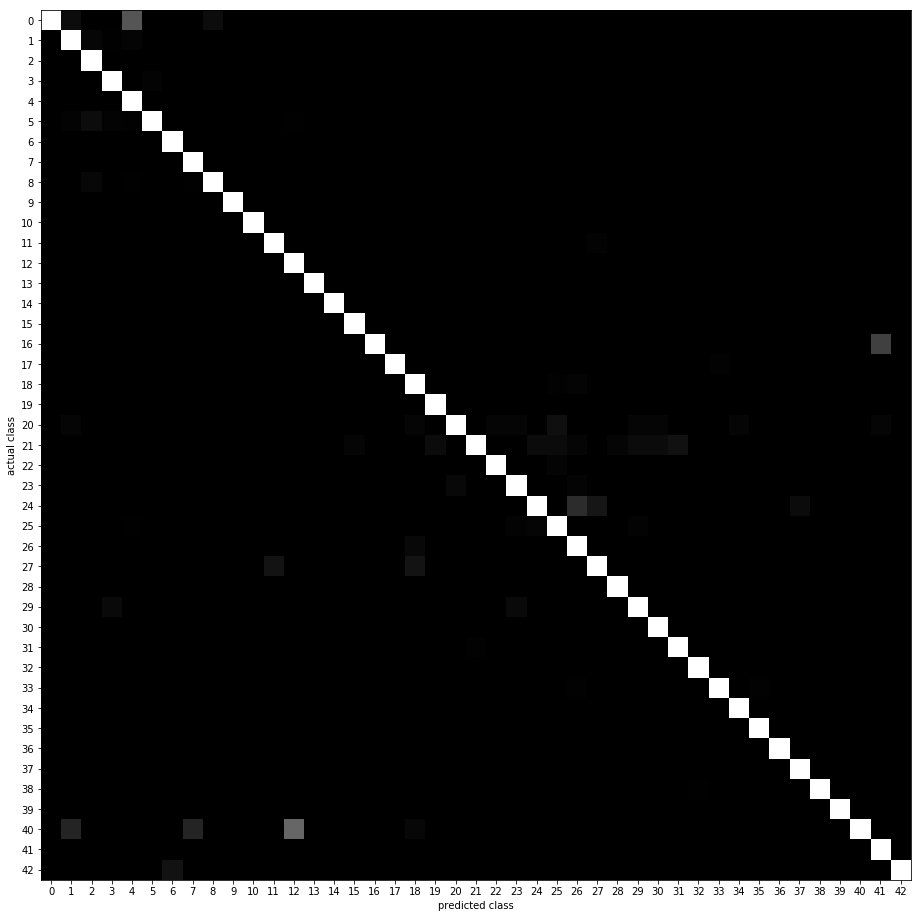

In [59]:
for yv, yhat in zip(y_valid, yhat_valid):
    confusion[yv, yhat] += 1
        
for i in range(len(confusion)):
    confusion[i, :] = 255*confusion[i, :]/np.max(confusion[i, :])

plt.figure(figsize=(16, 16));plt.imshow(confusion, cmap='gray')
plt.gca().set_xticks(range(0, 43))
plt.gca().set_yticks(range(0, 43))
plt.gca().set_ylabel('actual class')
plt.gca().set_xlabel('predicted class')
print()

Looks like class 40 is often misclassified as 12. What are they?

In [67]:
seek_a = 40
seek_b = 12

print('{}: {}'.format(seek_a, signnames[seek_a]))
print('{}: {}'.format(seek_b, signnames[seek_b]))

40: Roundabout mandatory
12: Priority road


They have similar description, how do they look like?

Text(0.5,1,'12:\nPriority road')

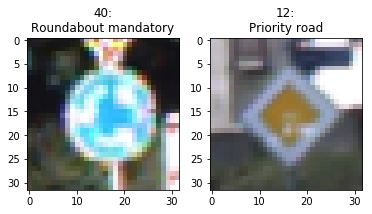

In [65]:
idxa = np.random.randint(0, len(y_valid))
while not y_valid[idxa] == 40:
    idxa = np.random.randint(0, len(y_valid))
    
idxb = np.random.randint(0, len(y_valid))
while not y_valid[idxb] == 12:
    idxb = np.random.randint(0, len(y_valid))
    
plt.subplot(1, 2, 1)
plt.imshow(X_valid[idxa])
plt.gca().set_title('40:\n{}'.format(signnames[40]))
plt.subplot(1, 2, 2)
plt.imshow(X_valid[idxb])
plt.gca().set_title('12:\n{}'.format(signnames[12]))

I think that myself, a genuine human person, can make that mistake too. Though I don't have a driver's licence.

---

## Step 3: Test a Model on New Images

The following German traffic signs are found around Berlin and Frankfurt (via Google Maps).

### Load and Output the Images

In [68]:
import os
import matplotlib.image as mpim

[17, 12, 5, 38, 13, 1]


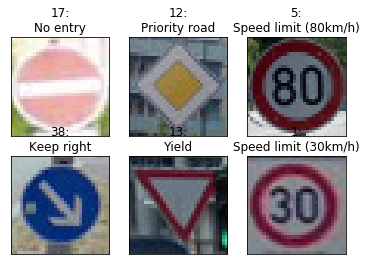

In [69]:
imdir = 'extra_german_signs'
signlist = os.listdir(imdir)
imnames = [os.path.join(imdir, fname) for fname in signlist]
labels = [int(sname[:-4]) for sname in signlist]
print(labels)
images = []
N = len(imnames)
i = 0
for imname, label in zip(imnames, labels):
    im = mpim.imread(imname)
    images.append(im)
    plt.subplot(2, N//2, i+1)
    plt.imshow(im)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.gca().set_title('{:d}:\n{}'.format(label, signnames[label]))
    i += 1
    
images = np.array(images)
### 38: keep right
### 13: yield
### 01: speed limit (30 km/h)
### 17: no entry
### 12: priority road
### 05: speed limit (80 km/h)

# labels = [38, 13, 1, 17, 12, 5]
images_normal = preproc_quick(greyscale(images))

### Predict the Sign Type for Each Image

In [70]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    test_logits = sess.run(logits, feed_dict={x: images_normal, keep_prob: 1.0})
    classes = sess.run(tf.argmax(test_logits, 1))
    print('| predict | actual |')
    print('|:-------:|:------:|')
    for cls, label in zip(classes, labels):
#         if cls == label:
#             lstr = signnames[label]
#         else:
#             lstr = '{} | {}'.format(signnames[cls], signnames[label])
        print('| {}: {:} | {}: {:} |'.format(cls, signnames[cls], label, signnames[label],))

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet
| predict | actual |
|:-------:|:------:|
| 17: No entry | 17: No entry |
| 12: Priority road | 12: Priority road |
| 2: Speed limit (50km/h) | 5: Speed limit (80km/h) |
| 38: Keep right | 38: Keep right |
| 13: Yield | 13: Yield |
| 1: Speed limit (30km/h) | 1: Speed limit (30km/h) |


### Analyze Performance

In [71]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    accuracy = evaluate(images_normal, labels)
    print('Accuracy on new images: {:6.3f}%'.format(100*accuracy))

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet
Accuracy on new images: 83.333%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [80]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    
    softies = sess.run(tf.nn.softmax(logits), feed_dict={x: images_normal, keep_prob: 1.0})
    top_5 = sess.run(tf.nn.top_k(softies, k=5))
    
    for vees, ix, l in zip(top_5.values, top_5.indices, labels):
        print('actual: {}'.format(signnames[l]))
        print('| probability | prediction |')
        print('|:-----------:|:----------:|')
        for vee, i in zip(vees, ix):
            print('| {:6.4f} | {:s} |'.format(vee, signnames[i]))
        print()
    print(labels)

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet
actual: No entry
| probability | prediction |
|:-----------:|:----------:|
| 1.0000 | No entry |
| 0.0000 | Stop |
| 0.0000 | Turn right ahead |
| 0.0000 | Speed limit (20km/h) |
| 0.0000 | Speed limit (30km/h) |

actual: Priority road
| probability | prediction |
|:-----------:|:----------:|
| 1.0000 | Priority road |
| 0.0000 | No vehicles |
| 0.0000 | Yield |
| 0.0000 | Traffic signals |
| 0.0000 | Roundabout mandatory |

actual: Speed limit (80km/h)
| probability | prediction |
|:-----------:|:----------:|
| 0.9998 | Speed limit (50km/h) |
| 0.0002 | Speed limit (30km/h) |
| 0.0000 | Speed limit (70km/h) |
| 0.0000 | Speed limit (80km/h) |
| 0.0000 | Speed limit (60km/h) |

actual: Keep right
| probability | prediction |
|:-----------:|:----------:|
| 1.0000 | Keep right |
| 0.0000 | Speed limit (20km/h) |
| 0.0000 | Speed limit (30km/h) |
| 0.0000 | Speed limit (50km/h) |
| 0.0000 | Speed limit (60km/h) |

act

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understanding the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what its feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for its second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [81]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

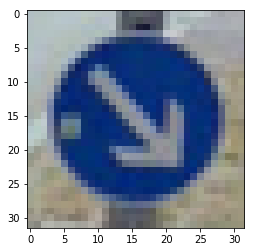

In [73]:
plt.imshow(images[0])
plt.figure();

INFO:tensorflow:Restoring parameters from ./experiments/default/signnet


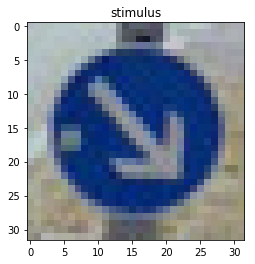

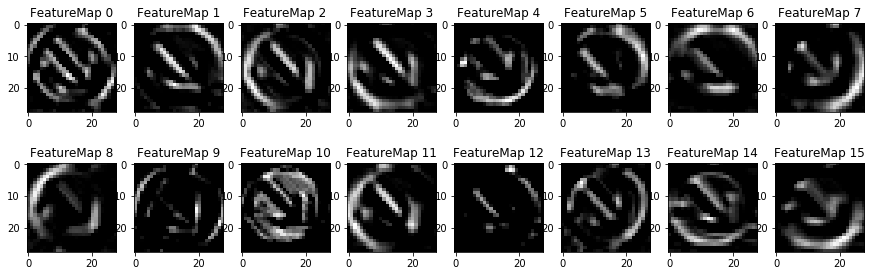

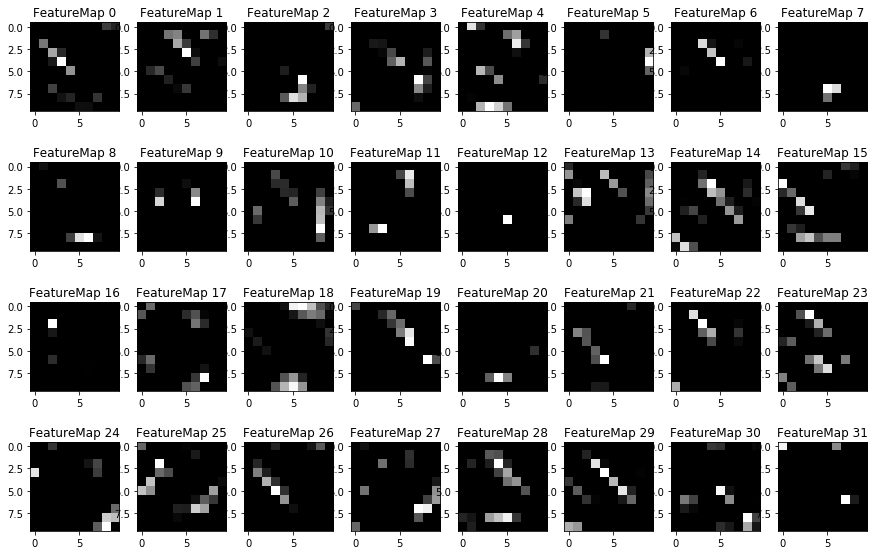

In [85]:
idx = 3

plt.plot();plt.imshow(images[idx])
plt.gca().set_title('stimulus')

with tf.Session() as sess:
    saver.restore(sess, './experiments/default/signnet')
    graph = tf.get_default_graph()
    ops = graph.get_operations()
    conv1 = graph.get_tensor_by_name('Relu:0')
    outputFeatureMap(images_normal[idx:idx+1], conv1, plt_num=2)
    
    conv2 = graph.get_tensor_by_name('Relu_1:0')
    outputFeatureMap(images_normal[idx:idx+1], conv2, plt_num=3)